## K-Means is a specific case of Expectation Maximization Algorithm

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [449]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=5,random_state=3)

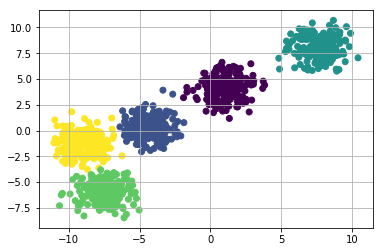

In [479]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)
plt.show()

In [480]:
k=5
colors=['red','green','yellow','purple','blue']
clusters={}

for i in range(k):
    center=20*(np.random.random((X.shape[1],)))-10
    
    cluster={
        'center':center,
        'points':[],
        'color':colors[i]
    }
    
    clusters[i]=cluster   

In [481]:
#print(clusters)
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [482]:
def assignPointsToClusters(clusters,X):   # E-step (Expectation Step)- Assign the data points to each cluster 
    k=len(clusters)

    ## Adding points to clusters
    for ix in range(X.shape[0]):
        dist=[]
        x_point=X[ix]
        for kx in range(k):
            d=distance(clusters[kx]['center'],x_point)
            dist.append(d)

        cluster_closest=np.argmin(dist)
        clusters[cluster_closest]['points'].append(x_point)
    
    return clusters



def updateClusters(clusters):   # M-step (Maximization Step) : Update centers of each cluster with the mean of all point data points in the cluster
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            clusters[kx]['center']=pts.mean(axis=0)  # updating center
        clusters[kx]['points']=[]                    # empty each cluster's point list
    
    return clusters



def plotClusters(clusters):
    for kx in range(len(clusters)):
        pts= np.array(clusters[kx]['points'])

        # plotting the clusters with their colors
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #plotting the centers
        center = clusters[kx]['center']
        plt.scatter(center[0],center[1],color='black',marker='*')

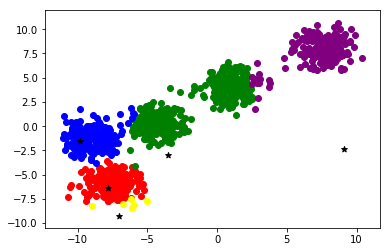

In [483]:
clusters=assignPointsToClusters(clusters,X)
plotClusters(clusters)

In [484]:
def KMeans(clusters,X):
    cluster_lengths=[0 for _ in range(len(clusters))]
    while True:
        curr_lengths=[0 for _ in range(len(clusters))]
        clusters=assignPointsToClusters(clusters,X)
        
        for kx in range(len(clusters)):
            curr_lengths.append(len(clusters[kx]['points']))
        
        if cluster_lengths==curr_lengths:
            break
        else:
            cluster_lengths=curr_lengths
    
        clusters=updateClusters(clusters)

In [485]:
KMeans(clusters,X)

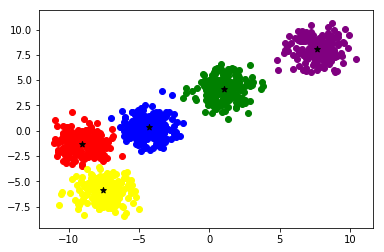

In [486]:
plotClusters(clusters)